In [1]:
%pip install python-docx
%pip install openai
%pip install rank_bm25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Word, Powerpoint 문서 기반 답변 결과 생성하기

##### 1. word 불러오기

In [ ]:
from docx import Document

path = '/content/drive/MyDrive/데이터/패스트캠퍼스 이용약관 및 규정.docx'

doc = Document(path)

doc_text = ''
for para in doc.paragraphs:
    print(para.text)
    doc_text += para.text



In [ ]:
len(doc_text)

9681

In [ ]:
doc_text[4000:5000]

' 관리하는 방법을 배우며, 마이크로서비스 아키텍처에 대한 이해를 높이고 실전 프로젝트를 통해 실력을 향상시킵니다.위에 소개된 강의들은 패스트캠퍼스에서 제공하는 대표적인 강의들로, 각각의 강의는 해당 분야에 대한 깊은 이해와 실전 경험을 제공합니다. 자세한 내용은 패스트캠퍼스의 웹사이트에서 확인하실 수 있습니다.할인 및 프로모션 규정할인 쿠폰 및 프로모션 코드 사용1.1 회원은 패스트캠퍼스에서 발급하는 할인 쿠폰 또는 프로모션 코드를 사용하여 강의를 할인받을 수 있습니다.1.2 할인 쿠폰 또는 프로모션 코드는 발급된 기간 내에만 유효하며, 유효기간이 만료된 이후에는 사용할 수 없습니다.1.3 한 번에 하나의 할인 쿠폰 또는 프로모션 코드만 사용할 수 있으며, 중복 사용은 불가능합니다.1.4 할인 쿠폰 또는 프로모션 코드는 현금으로 환불되거나 다른 혜택으로 교환될 수 없습니다.할인 행사2.1 패스트캠퍼스는 정기적으로 할인 행사를 진행할 수 있습니다. 이러한 할인 행사는 회원들에게 더 많은 혜택을 제공하기 위해 마련되며, 행사 기간과 할인율은 사전에 공지됩니다.2.2 할인 행사는 특정 강의 또는 강의 카테고리에 적용될 수 있으며, 해당 행사 조건은 사전에 공지됩니다.2.3 할인 행사는 사전 예고 없이 변경될 수 있으며, 이에 따른 불이익은 회사에서 책임지지 않습니다.회원 등급 혜택3.1 패스트캠퍼스는 회원 등급 시스템을 운영하며, 회원 등급에 따라 다양한 혜택을 제공할 수 있습니다.3.2 고객의 회원 등급은 해당 회원의 학습 이력, 활동, 결제 금액 등을 기반으로 결정됩니다.3.3 높은 등급의 회원은 할인 혜택, 추가 서비스, 특별 이벤트 등 다양한 혜택을 받을 수 있습니다.3.4 회원 등급은 정기적으로 확인되며, 회사의 판단에 따라 변경될 수 있습니다.기타 규정4.1 할인 및 프로모션 규정은 회사의 정책에 따라 변경될 수 있으며, 변경 사항은 회사의 웹사이트나 애플리케이션을 통해 공지됩니다.4.2 할인 및 프로모션 규정에 관한 추가 정보나 문의 사항은 회사의 고

In [ ]:
from openai import OpenAI

OPENAI_API_KEY='sk-'
model_name="gpt-3.5-turbo"

client = OpenAI(
    api_key=OPENAI_API_KEY,
)

prompt = f'주어진 문서를 기반으로 사용자의 질문에 답변해줘.\n 문서: {doc_text} 질문: 할인 쿠폰과 프로모션 코드를 동시에 사용할 수 있나요?'

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model=model_name,
)
print(chat_completion.choices[0].message.content)

할인 쿠폰과 프로모션 코드는 한 번에 하나씩만 사용할 수 있습니다. 즉, 동시에 두 가지를 함께 사용하는 것은 불가능합니다. 각각의 할인 혜택은 별도로 적용되며 중복 사용이 불가능하니, 이를 유의하시기 바랍니다.


##### 2. 질문과 관련있는 내용을 문서 찾아서 답변과 같이 반환하기

In [ ]:
from docx import Document

path = '/content/drive/MyDrive/데이터/패스트캠퍼스 이용약관 및 규정.docx'

doc = Document(path)

corpus = [para.text for para in doc.paragraphs]

In [ ]:
from rank_bm25 import BM25Okapi


def tokenizer(sent):
  return sent.split(" ")

tokenized_corpus = [tokenizer(doc) for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [ ]:
query = "할인 쿠폰과 프로모션 코드를 동시에 사용할 수 있나요?"
tokenized_query = tokenizer(query)
bm25.get_top_n(tokenized_query, corpus, n=5)

['1.1 회원은 패스트캠퍼스에서 발급하는 할인 쿠폰 또는 프로모션 코드를 사용하여 강의를 할인받을 수 있습니다.',
 '1.3 한 번에 하나의 할인 쿠폰 또는 프로모션 코드만 사용할 수 있으며, 중복 사용은 불가능합니다.',
 '1.2 할인 쿠폰 또는 프로모션 코드는 발급된 기간 내에만 유효하며, 유효기간이 만료된 이후에는 사용할 수 없습니다.',
 '할인 및 프로모션 규정',
 '할인 쿠폰 및 프로모션 코드 사용']

In [ ]:

def doc_based_answer(query):
  def tokenizer(sent):
    return sent.split(" ")
  tokenized_query = tokenizer(query)
  related_p = bm25.get_top_n(tokenized_query, corpus, n=5)

  doc_format = ""
  for i, p in enumerate(related_p):
    doc_format += f"[{i}]: {p} \n"

  prompt = f'주어진 문서를 기반으로 사용자의 질문에 답변해줘.\n 문서: {doc_format} 질문: 할인 쿠폰가 프로모션 코드를 동시에 사용할 수 있나요?'

  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model=model_name,
  )

  return chat_completion.choices[0].message.content + f"\n관련 문서: \n{doc_format}"

print(doc_based_answer('할인 쿠폰과 프로모션 코드를 동시에 사용할 수 있나요?'))

아니요, 한 번에 하나의 할인 쿠폰 또는 프로모션 코드만 사용할 수 있으며, 중복 사용은 불가능합니다.
관련 문서: 
[0]: 1.1 회원은 패스트캠퍼스에서 발급하는 할인 쿠폰 또는 프로모션 코드를 사용하여 강의를 할인받을 수 있습니다. 
[1]: 1.3 한 번에 하나의 할인 쿠폰 또는 프로모션 코드만 사용할 수 있으며, 중복 사용은 불가능합니다. 
[2]: 1.2 할인 쿠폰 또는 프로모션 코드는 발급된 기간 내에만 유효하며, 유효기간이 만료된 이후에는 사용할 수 없습니다. 
[3]: 할인 및 프로모션 규정 
[4]: 할인 쿠폰 및 프로모션 코드 사용 



##### 3. 언어모델을 사용할 수 있도록 PPT 변환하기

In [5]:
!apt-get install poppler-utils
%pip install pdf2image


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (330 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 131015 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


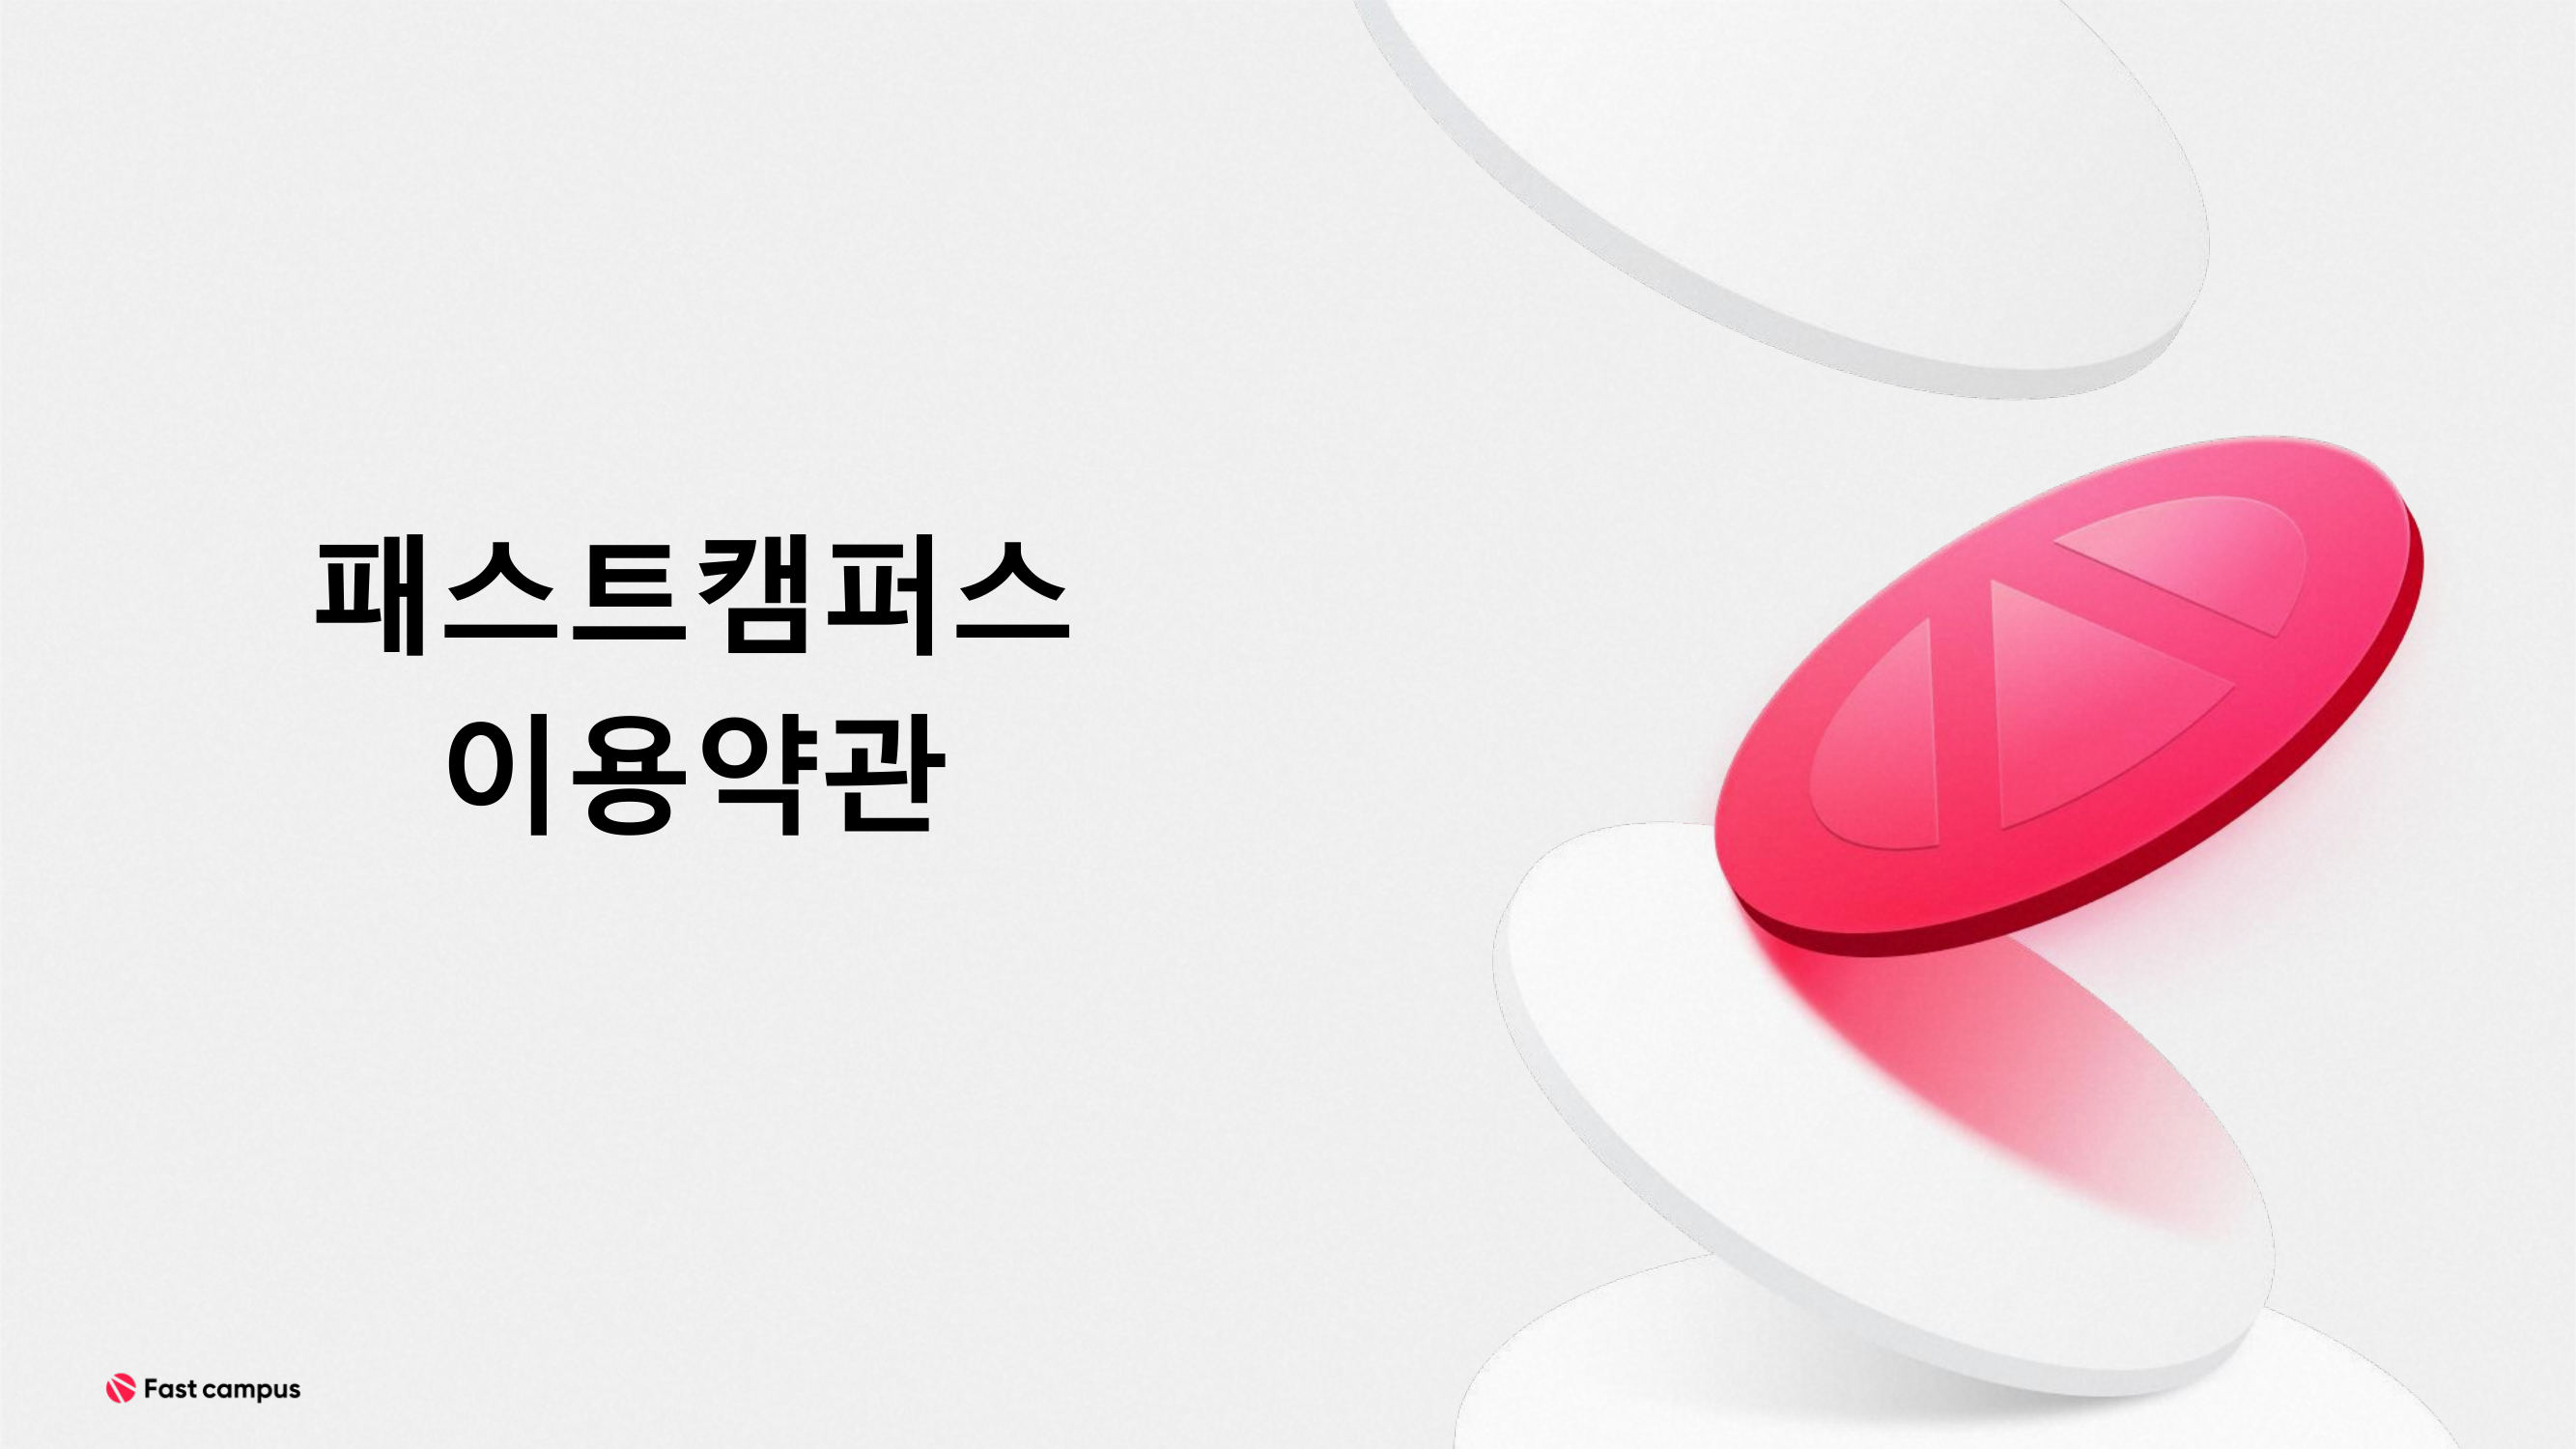

In [6]:
from pdf2image import convert_from_path
ppt_path = '/content/drive/MyDrive/데이터/패스트캠퍼스.pdf'

pages = convert_from_path(ppt_path)

save_path = '/content/drive/MyDrive/데이터/images'
for i, p in enumerate(pages):
  p.save(f'{save_path}/{i}', 'jpeg')
pages[0]

In [9]:
import os
from openai import OpenAI
import requests
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt

OPENAI_API_KEY='sk-'
client = OpenAI(
    api_key=OPENAI_API_KEY,
)

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

image_path = '/content/drive/MyDrive/데이터/images/1'

base64_image = encode_image(image_path)

chat_completion = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "해당 사진에 대한 설명을 써줘"},
                {
                    "type": "image_url",
                    "image_url": f"data:image/jpeg;base64,{base64_image}"
                }
            ]
        }
    ]
)

print(chat_completion.choices[0].message.content)


이 사진은 특정 이벤트 또는 프로모션의 일정을 나타내는 달력입니다. 달력에는 오렌지색 및 노란색으로 하이라이트된 특별 일자가 표시되어 있습니다. 오렌지색으로 표시된 기간은 4월 8일 토요일부터 4월 14일 금요일까지이며, 이 기간 동안 '1+1 이벤트 퀵 기간'이 있다고 설명되어 있습니다. 노란색으로 표시된 4월 30일 일요일은 '1+1 특가 상품 기간 (4월 30일 23:59까지)'으로 언급되어 있습니다.

추가적으로, 이미지 하단 'STEP 01'이라고 적혀 있는 세부 사항에는 '4월 8일(월)부터 4월 14일(일) 23:59까지' 토큰 색을 칠한 빈칸에 강력을 그려 컬렉션한다고 설명되어 있습니다. 따라서 이는 특정 프로모션의 일정과 규칙을 설명하는 그래픽입니다.


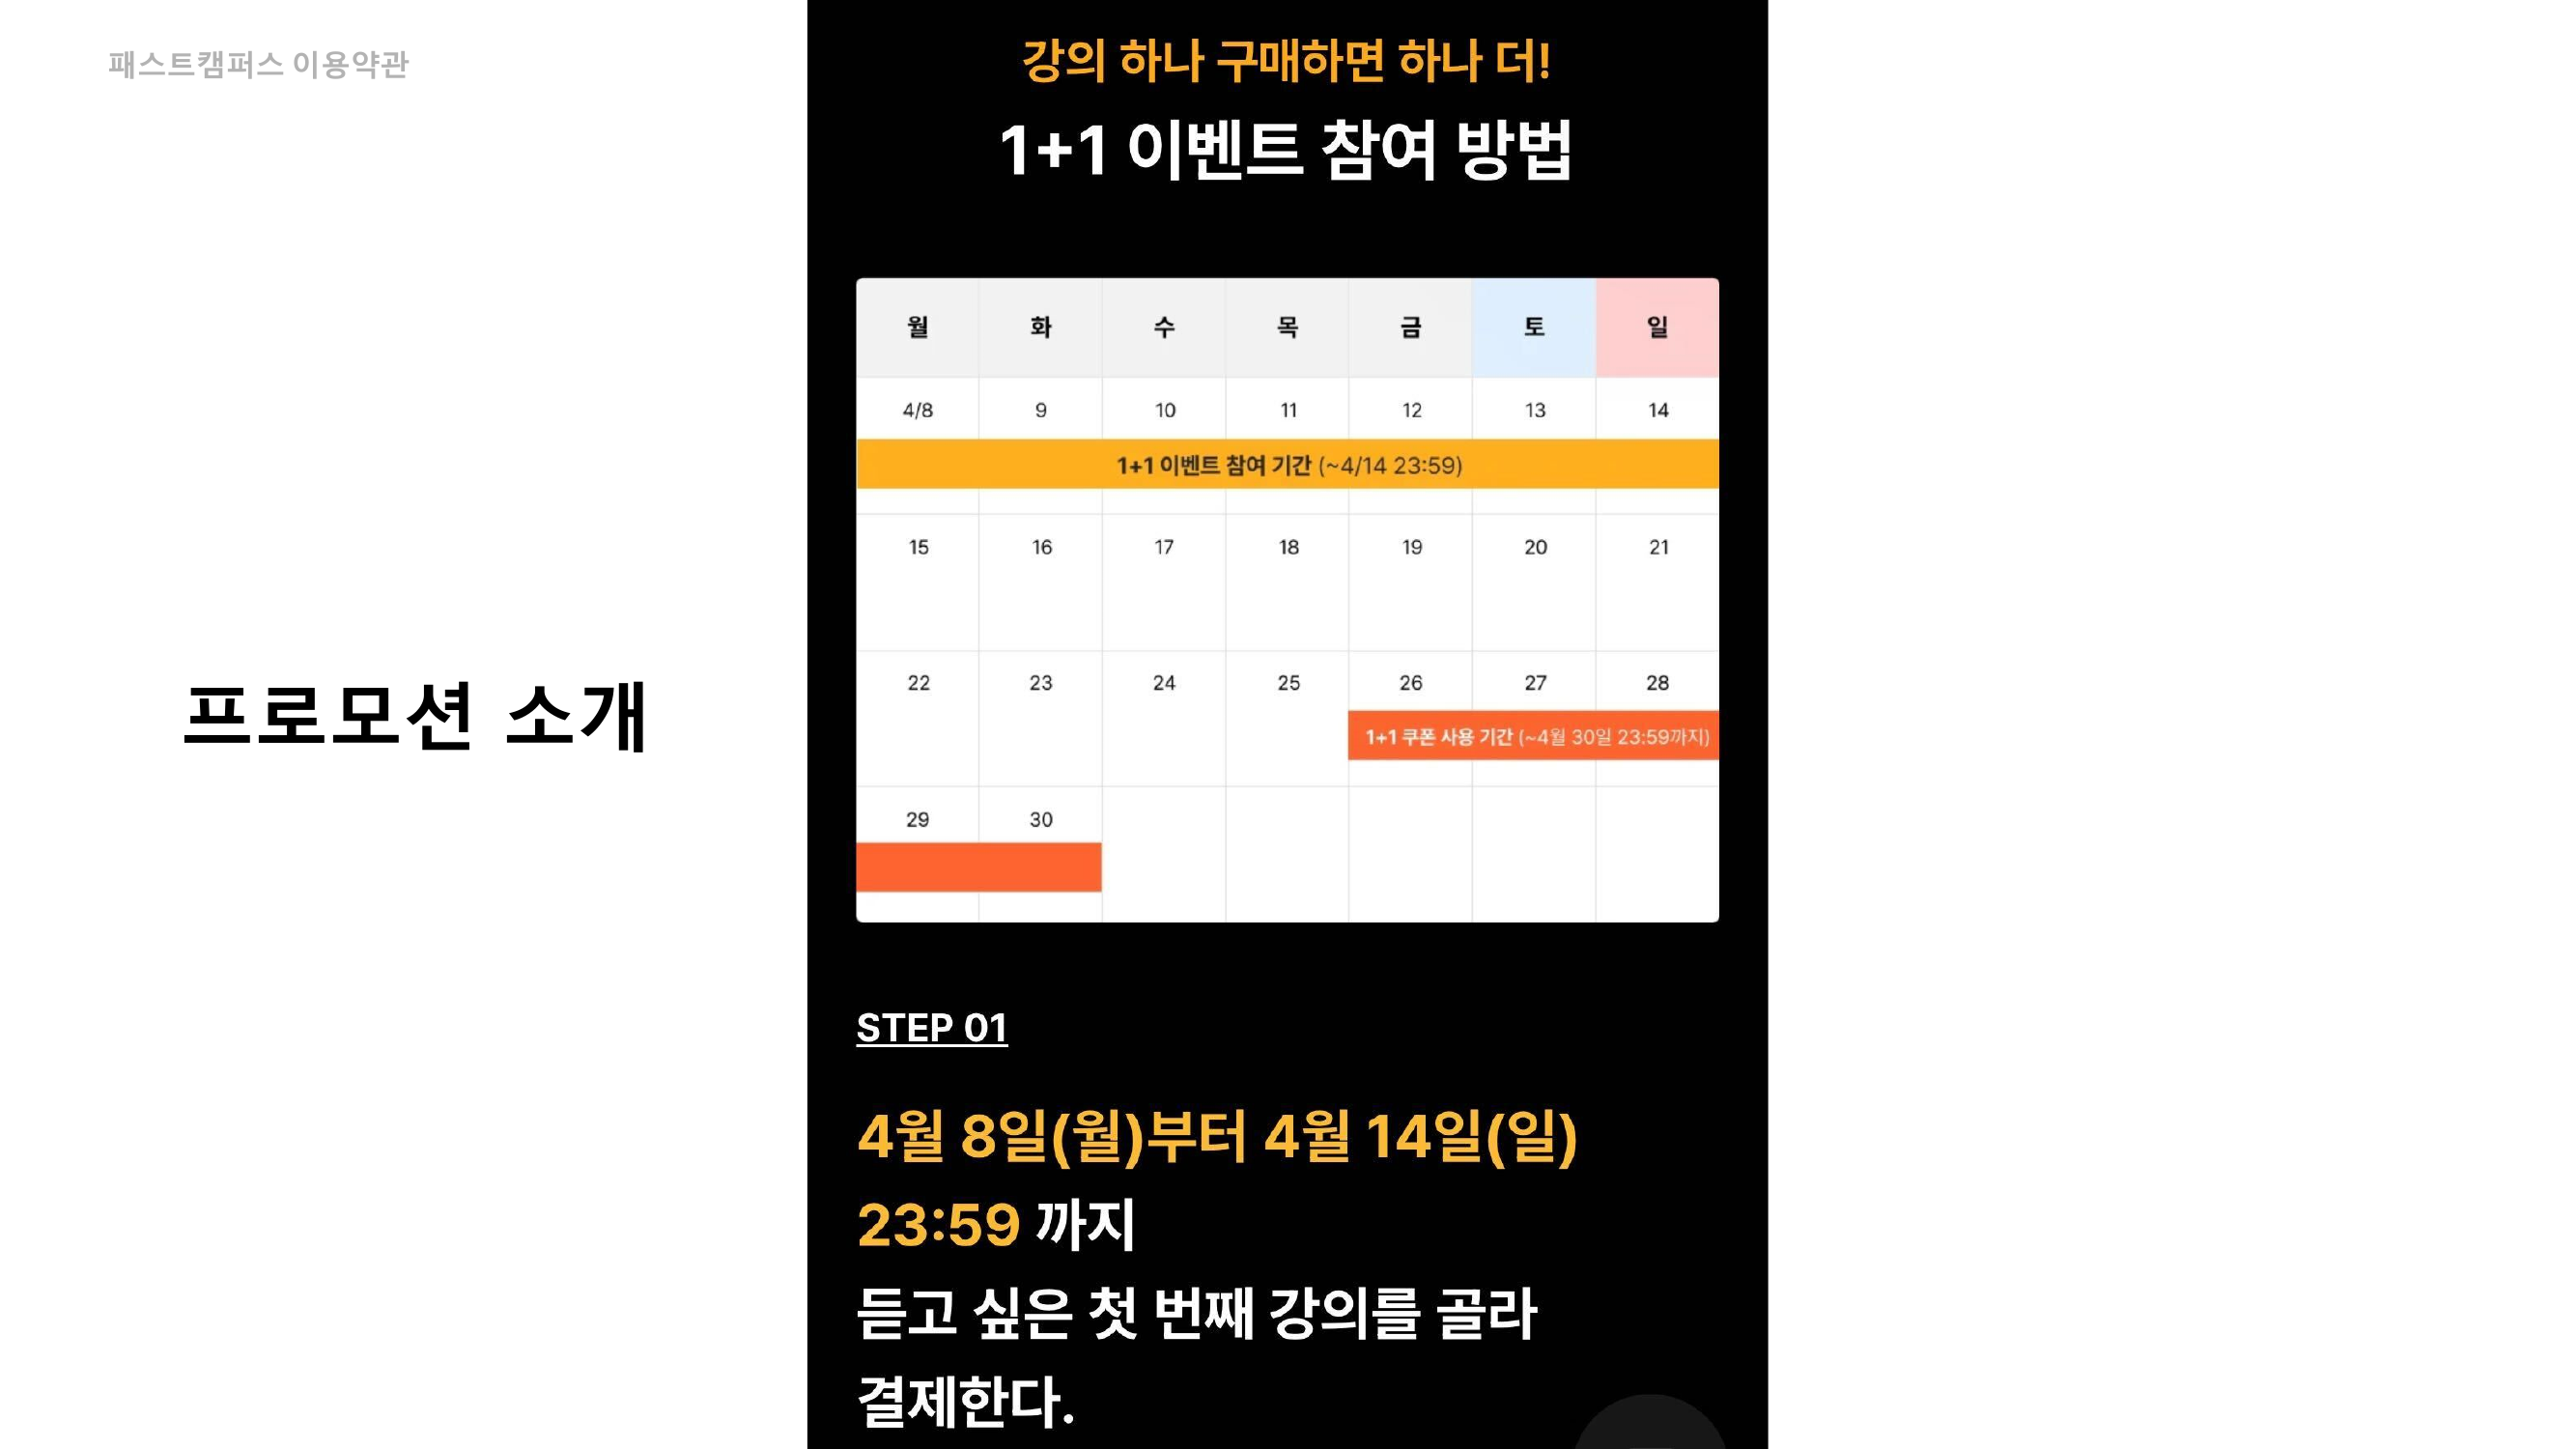

In [10]:
pages[1]

##### PPT 기반 상담 봇 만들기

In [11]:
import os
from openai import OpenAI
import base64


class PPT_chatbot:
  def __init__(self, slide_list):
    OPENAI_API_KEY='sk-'
    self.client = OpenAI(
        api_key=OPENAI_API_KEY,
    )
    self.ppt_description = ""
    for slide_path in slide_list:
      base64_image = self.__encode_image__(slide_path)
      self.ppt_description += self.image_based_answer(base64_image)

  def __encode_image__(self, image_path):
    with open(image_path, "rb") as image_file:
      return base64.b64encode(image_file.read()).decode('utf-8')

  def image_based_answer(self, base64_image):
    chat_completion = self.client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "해당 사진에 대한 자세한 설명을 써줘"},
                {
                    "type": "image_url",
                    "image_url": f"data:image/jpeg;base64,{base64_image}"
                }
            ]
        }
      ]
    )
    return chat_completion.choices[0].message.content

  def answer(self, query):
    system_prompt = f"너는 주어진 설명을 바탕으로 답변해 주는 인공지능 챗봇이야. 사용자의 질문에 대해 친절하게 답변해줘. \n설명: {self.ppt_description}"
    chat_completion = self.client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": query,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return chat_completion.choices[0].message.content


In [12]:
slide_list = [f'/content/drive/MyDrive/데이터/images/{i}' for i in range(6)]
chat_bot = PPT_chatbot(slide_list)

In [13]:
chat_bot.ppt_description

'이 사진은 광고나 정보그래픽 포스터를 연상시키는 이미지로 보입니다. 배경은 깔끔한 화이트 톤에 몇 개의 회색 원 형태의 그래픽이 부분적으로 보이며, 오른쪽에는 진한 분홍색 타원형 객체가 있고 그 위에는 화이트 컬러의 플레이(재생) 기호가 있습니다. 타원형 객체의 그림자는 백색이며 빛의 방향을 나타내는 듯 보이는 하이라이트가 추가되어 입체감을 더하고 있습니다. 왼쪽 상단에는 한글로 "패스트 트랙 패스 이용안내"라고 적혀 있으며, 하단에는 \'Fast campus\'라는 로고가 적혀 있습니다. 전체적으로 현대적이고 심플한 디자인의 그래픽이며, \'패스트 트랙 패스\'라는 것과 관련한 안내나 광고의 일부로 보입니다. Fast campus라는 단어로 미루어 봤을 때, 아마도 교육 기관이나 관련 서비스의 프로모션일 가능성이 높아 보입니다.이 이미지는 한 프로모션 이벤트에 대한 정보를 제공하는 한국어 달력입니다. 상단에는 "강의 하나 구매하면 하나 더! 1+1 이벤트 참여 방법"이라고 쓰여 있어, 어떠한 교육 강의의 1+1 이벤트를 홍보하는 내용임을 알 수 있습니다. 달력에는 두 개의 기간이 주황색으로 표시되어 있는데, 첫 번째 기간은 4월 8일부터 4월 14일까지이며, "1+1 이벤트 할인 기간"이라고 표기되어 있습니다. 두 번째 기간은 4월 29일 하루이며, "1+1 수업 사용 기간 (~4월 30일 23:59까지)"이라고 명시되어 있습니다.\n\n또한, 하단에는 이벤트 참여 방법에 대한 안내가 적혀 있습니다. "STEP 01"의 내용은 이벤트 기간인 4월 8일부터 4월 14일까지 해당 수업을 구입할 것을 권장하고, 저녁 11시 59분까지 토고 씨오 창문 백챠 강의를 결제하라는 내용입니다.\n\n이러한 프로모션은 보통 사전에 정해진 조건에 따라 할인 혜택이나 추가 혜택을 제공하는 마케팅 전략으로, 고객들에게 구매를 유도하기 위하여 사용됩니다.이 이미지에는 주황색 동그란 아이콘과 체크 표시가 있는 숫자 목록으로 구성된 문서가 보입니다. 각 번호마다 한국어로 된 텍스트가

In [14]:
query_list = ["1+1 이벤트를 참여하려면 어떻게 해야하나요?", "환불 요청은 결제 몇일 이후까지 가능한가요?"]

for q in query_list:
  print(f"Q: {q}")
  print(f"A: {chat_bot.answer(q)}")
  print("\n===============================\n")

Q: 1+1 이벤트를 참여하려면 어떻게 해야하나요?
A: 1+1 이벤트에 참여하려면 다음 단계를 따르셔야 합니다:

STEP 01: 4월 8일부터 4월 14일 사이에 해당 수업을 구매할 것을 권장하며, 저녁 11시 59분까지 토고 씨오 창문 백챠 강의를 결제하시면 됩니다.

이렇게 함으로써 1+1 이벤트에 참여하실 수 있습니다.期


Q: 환불 요청은 결제 몇일 이후까지 가능한가요?
A: 일반적으로 환불 요청은 결제 후 7일 이내에 가능합니다. 이 기간을 초과하면 환불이 어려울 수 있습니다.환불 정책은 각 서비스나 상품에 따라 다를 수 있으니, 상세한 정보가 필요하시다면 해당 서비스 고객센터에 문의하시는 것이 좋습니다.


